In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [2]:
tickers = input("Enter ticket: ").upper()
coun=input("Enter country").upper()
df = yf.download(tickers+'.'+coun, start='2019-01-01',end='2024-01-01')

Enter ticket: lt
Enter countryns


[*********************100%%**********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,1445.000000,1445.000000,1425.199951,1441.900024,1329.895752,786846
2019-01-02,1441.000000,1444.900024,1417.099976,1425.500000,1314.769653,2058504
2019-01-03,1426.000000,1429.000000,1391.000000,1395.000000,1286.638672,2290756
2019-01-04,1401.900024,1407.599976,1373.550049,1388.050049,1280.228760,2711485
2019-01-07,1397.000000,1408.599976,1379.050049,1383.800049,1276.308838,1851513


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,1677.548865,1695.739877,1659.018221,1676.629475,1636.205836,3.076763e+06
std,567.417470,571.095811,565.168969,568.986766,590.886208,2.192253e+06
min,697.200012,755.750000,661.000000,707.900024,670.619507,2.694000e+05
25%,1327.349976,1340.424988,1313.000000,1325.200012,1242.511108,1.734908e+06
50%,1547.949951,1566.900024,1528.699951,1547.949951,1485.125854,2.396206e+06
75%,1952.500000,1975.750000,1943.025024,1956.775024,1944.783325,3.698040e+06
max,3545.000000,3559.949951,3504.149902,3544.000000,3544.000000,2.115335e+07


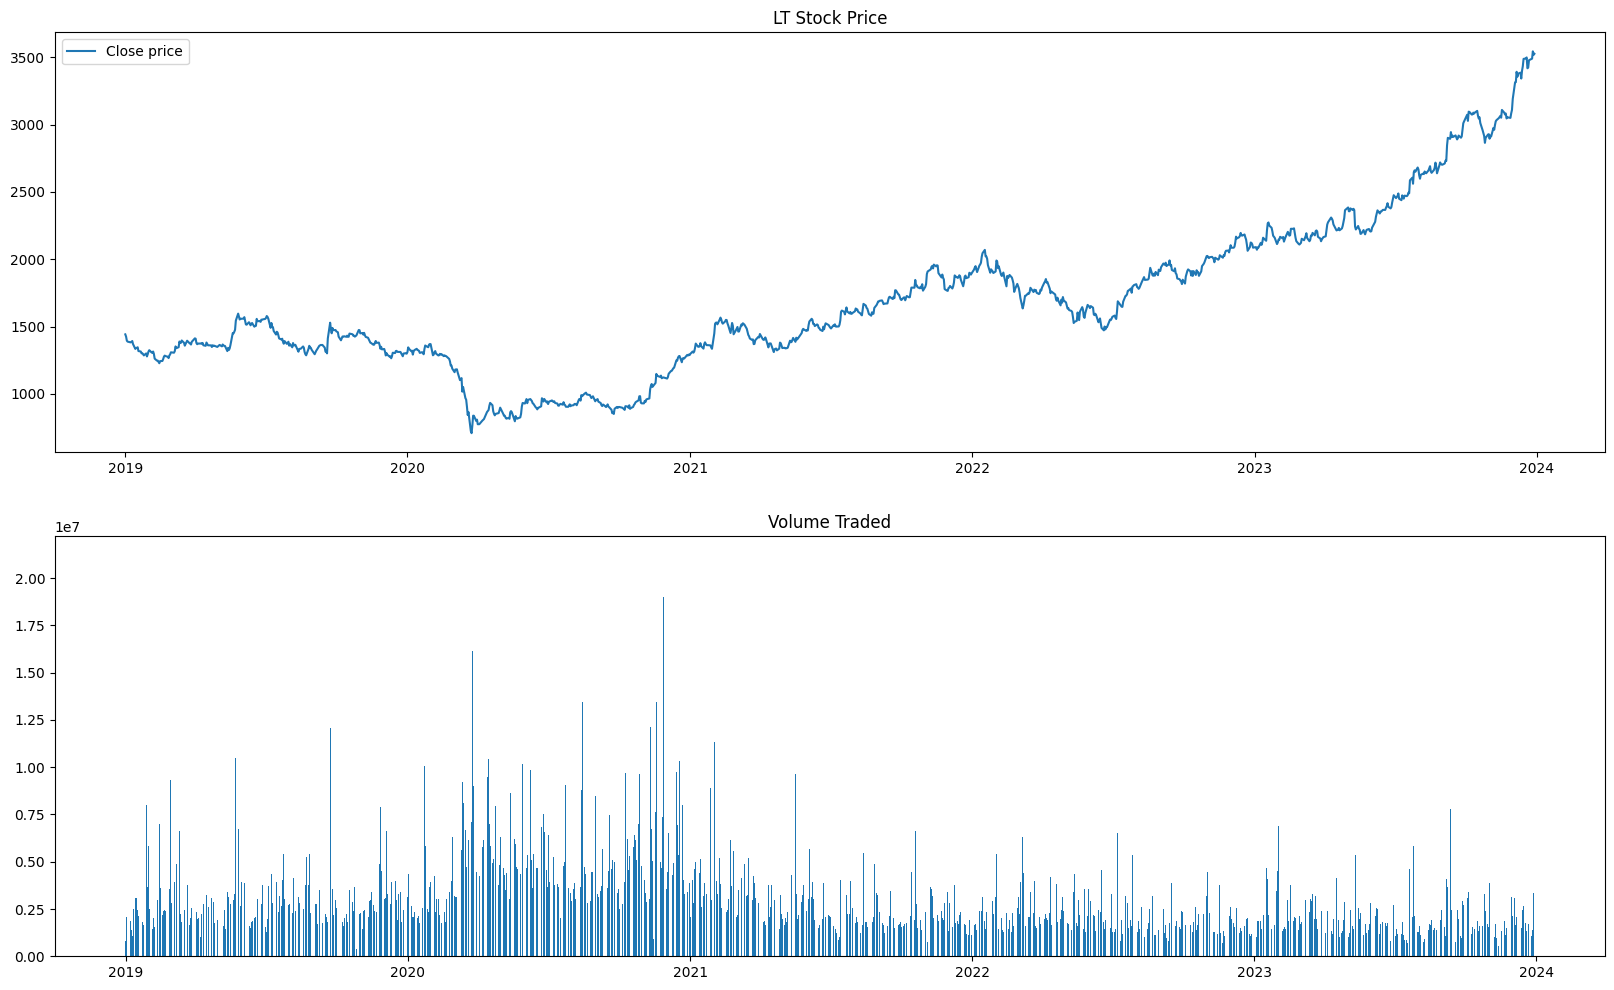

In [6]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title(f'{tickers} Stock Price')
plt.plot(df.Close,label='Close price')
plt.legend()
plt.subplot(2, 1, 2)
plt.title('Volume Traded')
plt.bar(x=df.index,height=df['Volume'])
plt.show()

In [7]:
data = list(df["Close"])

In [8]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print("1. ADF : ",result[0])
print("2. P-Value : ", result[1])
print("3. Num Of Lags : ", result[2])
print("4. Num Of Observations Used For ADF Regression:", result[3])
print("5. Critical Values :")
for key, val in result[4].items():
  print("\t",key, ": ", val)

1. ADF :  2.1358288660225733
2. P-Value :  0.9988254139875421
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression: 1233
5. Critical Values :
	 1% :  -3.4356646522289815
	 5% :  -2.863886926389418
	 10% :  -2.568019536239491


In [9]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.8 MB/s eta 0:00:00


In [10]:
from pmdarima.arima.utils import ndiffs
d_value = ndiffs(data,test = "adf")
print("d value:", d_value)

d value: 1


In [11]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [12]:
x_train= data[:-100]
x_test = data[-100:]
print(len(x_train),len(x_test))

1135 100


In [13]:
stepwise_fit = auto_arima(data,trace=True,suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=1.87 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=12359.038, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=12063.654, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=11927.836, Time=0.11 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=11845.068, Time=0.14 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=11775.950, Time=0.19 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=11765.264, Time=0.72 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=2.58 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=3.08 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=11767.256, Time=2.44 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 11.545 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1235
Model:  

In [14]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data, order=(5,2,0))

In [15]:
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1235
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -5876.632
Date:                Tue, 23 Apr 2024   AIC                          11765.264
Time:                        05:52:24   BIC                          11795.968
Sample:                             0   HQIC                         11776.815
                               - 1235                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7824      0.023    -34.223      0.000      -0.827      -0.738
ar.L2         -0.6416      0.029    -22.415      0.000      -0.698      -0.586
ar.L3         -0.4839      0.033    -14.777      0.000      -0.548      -0.420
ar.L4         -0.3138      0.031    -10.013      0.000      -0.375      -0.252
ar.L5         -0.1013      0.025     -4.021      0.000      -0.151      -0.052
sigma2       807.2167     23.990     33.648      0.000     760.197     854.237
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):               164.90
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               1.50   Skew:                             0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
pred = model.predict(start=start,end=end)
pred

array([2625.20918501, 2588.84414428, 2625.940132  , 2630.64654065,
       2622.16689   , 2652.00215256, 2649.10062419, 2643.53073711,
       2666.00116667, 2702.42188599, 2651.26563553, 2640.89691329,
       2668.44344244, 2685.82314378, 2724.74245475, 2687.12236319,
       2635.60771719, 2708.26737268, 2729.1684204 , 2708.34577601,
       2699.78531512, 2710.59116439, 2721.07054512, 2738.08097008,
       2731.95310523, 2875.48828602, 2935.11171338, 2923.77533411,
       2984.03070504, 2938.25907895, 2946.00303947, 2914.65097233,
       2926.26113514, 2882.64530611, 2895.98851829, 2920.2635504 ,
       2899.49365332, 2911.89640949, 2977.58694426, 3031.05112618,
       3041.35589955, 3102.50769911, 3046.80597221, 3129.51650318,
       3111.51864529, 3085.19671483, 3080.22384345, 3098.15474444,
       3085.4167302 , 3088.27816971, 3105.09815022, 3063.17147994,
       3039.16842166, 3050.84316178, 2998.52694417, 2932.16578   ,
       2886.16977422, 2831.54802556, 2878.86984439, 2905.87650

In [17]:
s = pd.Series(pred, index =df.index[-100:])
s

Date
2023-08-03    2625.209185
2023-08-04    2588.844144
2023-08-07    2625.940132
2023-08-08    2630.646541
2023-08-09    2622.166890
                 ...     
2023-12-22    3430.861947
2023-12-26    3485.341543
2023-12-27    3489.386971
2023-12-28    3550.537313
2023-12-29    3524.113777
Length: 100, dtype: float64

<Axes: xlabel='Date'>

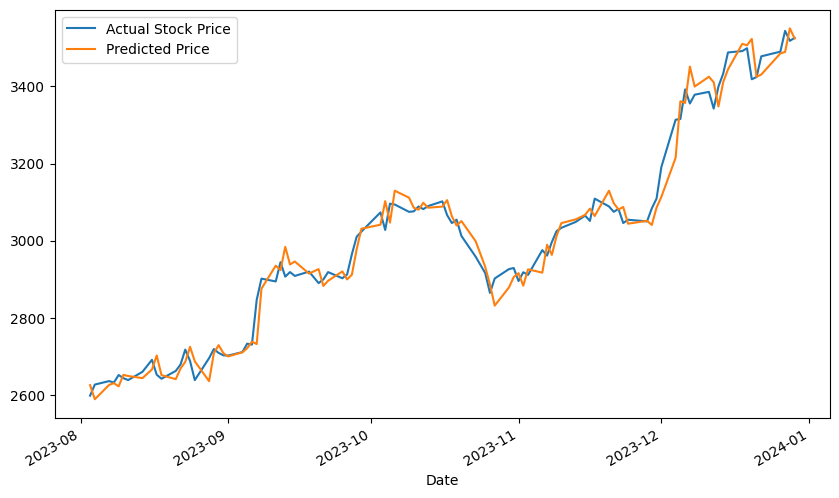

In [18]:
plt.figure(figsize=(10,6), dpi=100)
df['Close'][-100:].plot(label='Actual Stock Price', legend=True)
s.plot(label='Predicted Price', legend=True,)

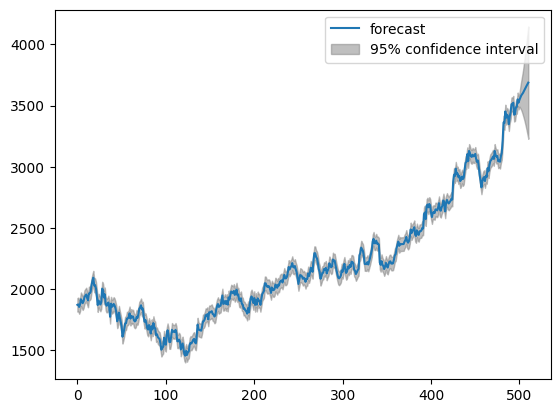

In [19]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model, start = len(data)-500, end = len(data)+10, dynamic = False);

In [20]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(x_test,pred))

38.36007778830756

In [21]:
from sklearn.metrics import r2_score
r2_score(x_test,pred)

0.9777221140037629

In [22]:
pred_future = model.predict(start=end,end=end+3)
pred_future

array([3524.11377656, 3546.64645114, 3565.36589899, 3581.87369877])

In [23]:
import datetime
start_date = datetime.datetime(2024,1,2)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(4)]

In [24]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2024-01-02    3524.113777
2024-01-03    3546.646451
2024-01-04    3565.365899
2024-01-05    3581.873699
dtype: float64

<Axes: xlabel='Date'>

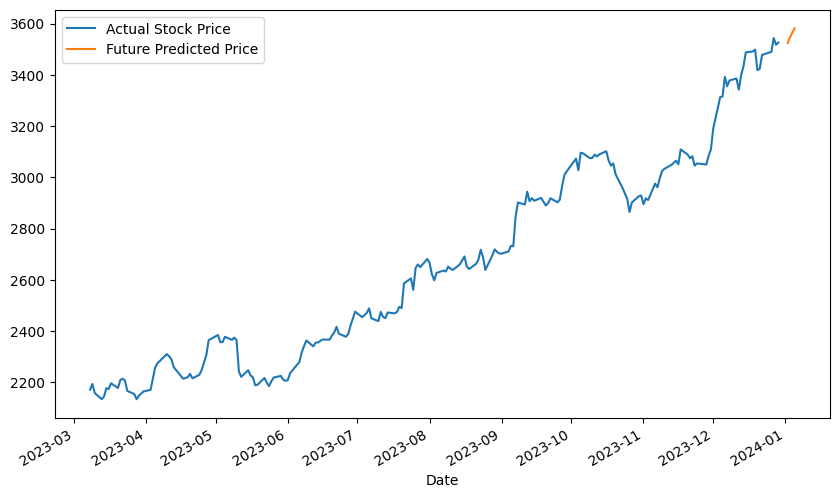

In [25]:
plt.figure(figsize=(10,6), dpi=100)
df['Close'][-200:].plot(label='Actual Stock Price', legend=True)
pred_future2.plot(label='Future Predicted Price', legend=True)

In [26]:
df2 = yf.download(tickers+'.'+coun, start='2024-01-02',end='2024-01-05')
df2

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,3525.050049,3525.449951,3432.000000,3438.100098,3438.100098,1511464
2024-01-03,3433.000000,3465.850098,3411.600098,3440.350098,3440.350098,1283859
2024-01-04,3441.050049,3480.100098,3423.000000,3458.699951,3458.699951,1651616


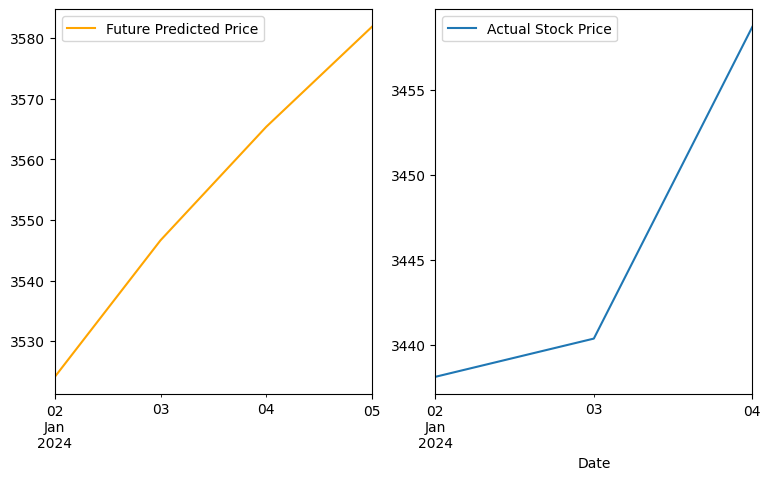

In [27]:
plt.figure(figsize=(9,5), dpi=100)
plt.subplot(1, 2, 1)
pred_future2.plot(label='Future Predicted Price', legend=True, color='orange')
plt.subplot(1, 2, 2)
df2['Close'].plot(label='Actual Stock Price', legend=True)
plt.show()